In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

print("Initial Data Preview:")

print("\n" + "="*50 + "\n")
df.head()

Initial Data Preview:




,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


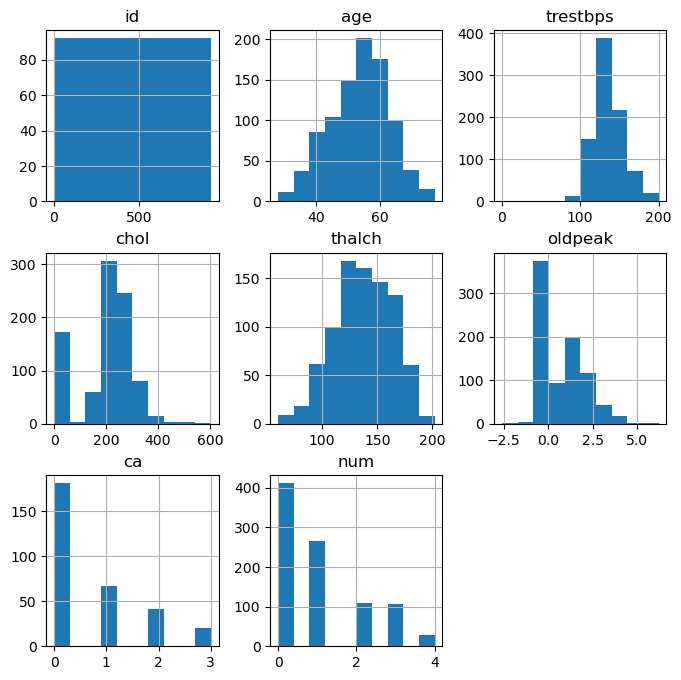

In [3]:
df.hist(figsize=(8,8));

In [4]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## Data Cleaning and Preprocessing
-  This is the core data preparation stage, where we handle missing values, correct outliers, and prepare features for modeling.


### 1. Drop irrelevant columns

In [6]:
# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

### 2. Create `'heart_disease'` from the `'num'` column
 * A value > 0 means the patient has heart disease (1), otherwise they don't (0).

In [7]:
df['heart_disease'] =  df['num'].apply(lambda x : 0 if x == 0 else 1)
df['heart_disease'].value_counts()
df = df.drop(columns=['num']) ## num is not useful  now, so i drop it 

### 3. Data Cleaning and Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            920 non-null    int64  
 1   sex            920 non-null    object 
 2   cp             920 non-null    object 
 3   trestbps       861 non-null    float64
 4   chol           890 non-null    float64
 5   fbs            830 non-null    object 
 6   restecg        918 non-null    object 
 7   thalch         865 non-null    float64
 8   exang          865 non-null    object 
 9   oldpeak        858 non-null    float64
 10  slope          611 non-null    object 
 11  ca             309 non-null    float64
 12  thal           434 non-null    object 
 13  heart_disease  920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [9]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,heart_disease
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [10]:
#  Replace physiologically impossible zeros in some columns
zero_cols = ['trestbps', 'chol']
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Fill with median values
for col in zero_cols:
    df[col] = df[col].fillna(df[col].median())

In [11]:
# Separate numerical and categorical columns for processing
numrical_cols = ['age','trestbps','chol','thalch','oldpeak','ca']
categroical_cols =  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [12]:
# Fill numerical NaNs with mean
df[numrical_cols] = df[numrical_cols].fillna(df[numrical_cols].mean())

# Fill categorical NaNs with mode
for col in categroical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\user\AppData\Local\Temp\ipykernel_13236\3463651557.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            920 non-null    int64  
 1   sex            920 non-null    object 
 2   cp             920 non-null    object 
 3   trestbps       920 non-null    float64
 4   chol           920 non-null    float64
 5   fbs            920 non-null    bool   
 6   restecg        920 non-null    object 
 7   thalch         920 non-null    float64
 8   exang          920 non-null    bool   
 9   oldpeak        920 non-null    float64
 10  slope          920 non-null    object 
 11  ca             920 non-null    float64
 12  thal           920 non-null    object 
 13  heart_disease  920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 88.2+ KB


#### Check numrical Data values if they  containing any exterm values 

In [14]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,heart_disease
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,132.136957,245.222826,137.545665,0.878788,0.676375,0.553261
std,9.424685,17.929761,51.785328,25.138494,1.053774,0.541667,0.497426
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,217.750000,120.000000,0.000000,0.676375,0.000000
50%,54.000000,130.000000,239.500000,138.000000,0.800000,0.676375,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,0.676375,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


#### Optimize Data Frame size for Memory Efficiency -- read some doc --

In [15]:

# Optimize Data Frame size
print("Optimizing data types for memory efficiency...")
df['age'] = df['age'].astype('int8')
df['trestbps'] = df['trestbps'].astype('float32')
df['chol'] = df['chol'].astype('float32')
df['thalch'] = df['thalch'].astype('float32')
df['oldpeak'] = df['oldpeak'].astype('float32')
df['ca'] = df['ca'].astype('float32')
df['heart_disease'] = df['heart_disease'].astype('int8')


# Convert object columns to categorical type
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].astype('category')
print("Data types optimized.")


Optimizing data types for memory efficiency...
Data types optimized.


In [16]:
print("--- Cleaned DataFrame Info ---")
print("\n--- Final Cleaned DataFrame Info ---")
df.info()

--- Cleaned DataFrame Info ---

--- Final Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            920 non-null    int8    
 1   sex            920 non-null    category
 2   cp             920 non-null    category
 3   trestbps       920 non-null    float32 
 4   chol           920 non-null    float32 
 5   fbs            920 non-null    bool    
 6   restecg        920 non-null    category
 7   thalch         920 non-null    float32 
 8   exang          920 non-null    bool    
 9   oldpeak        920 non-null    float32 
 10  slope          920 non-null    category
 11  ca             920 non-null    float32 
 12  thal           920 non-null    category
 13  heart_disease  920 non-null    int8    
dtypes: bool(2), category(5), float32(5), int8(2)
memory usage: 26.9 KB


In [17]:
print("\n--- Final Cleaned Descriptive Statistics ---")
print(df.describe())


--- Final Cleaned Descriptive Statistics ---
              age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean    53.510870  132.136963  245.222824  137.545670    0.878788    0.676375   
std      9.424685   17.929760   51.785328   25.138494    1.053774    0.541667   
min     28.000000   80.000000   85.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  217.750000  120.000000    0.000000    0.676375   
50%     54.000000  130.000000  239.500000  138.000000    0.800000    0.676375   
75%     60.000000  140.000000  267.000000  156.000000    1.500000    0.676375   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

       heart_disease  
count     920.000000  
mean        0.553261  
std         0.497426  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000  


##  Exploratory Data Visualization
- Generate key plots to understand the relationships between variables.


In [18]:
# Set a style for the plots
sns.set_style("whitegrid")

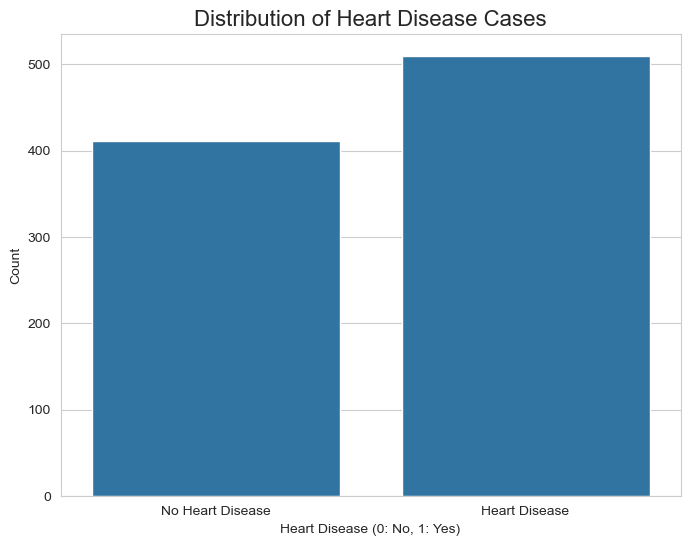

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', data=df)
plt.title('Distribution of Heart Disease Cases', fontsize=16)
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

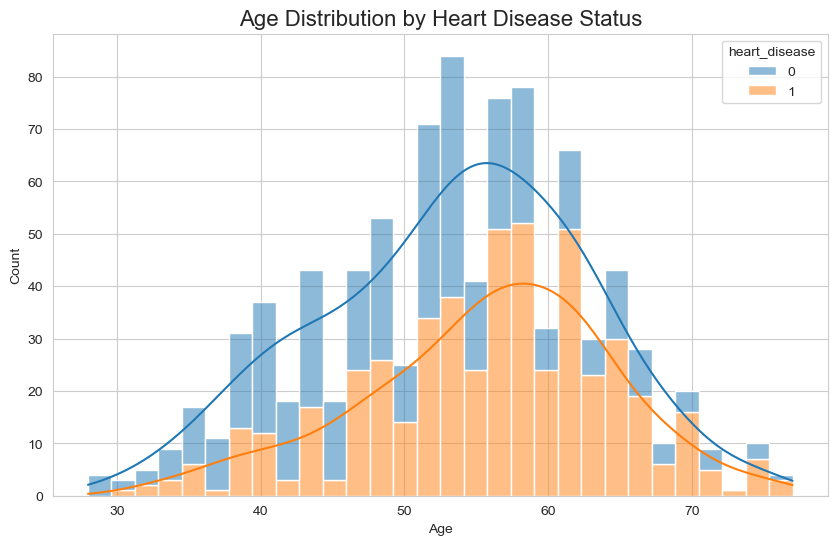

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='heart_disease', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


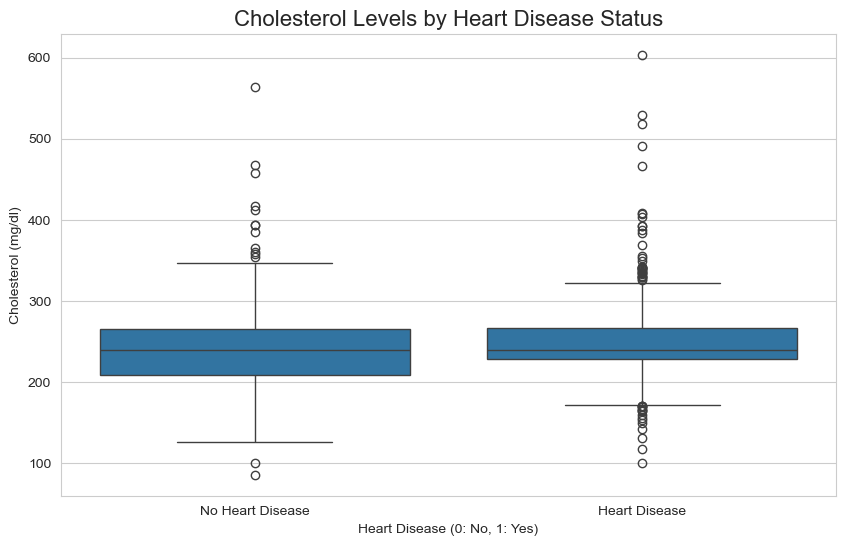

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_disease', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol (mg/dl)')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

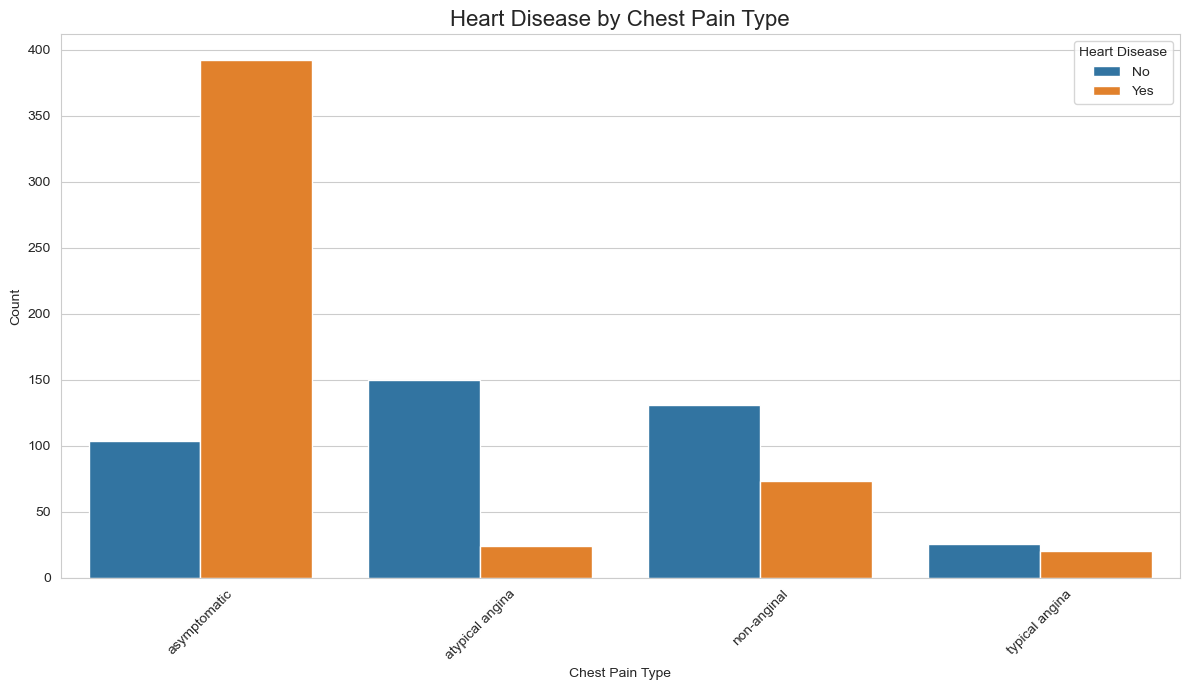

In [22]:
plt.figure(figsize=(12, 7))
sns.countplot(x='cp', hue='heart_disease', data=df)
plt.title('Heart Disease by Chest Pain Type', fontsize=16)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

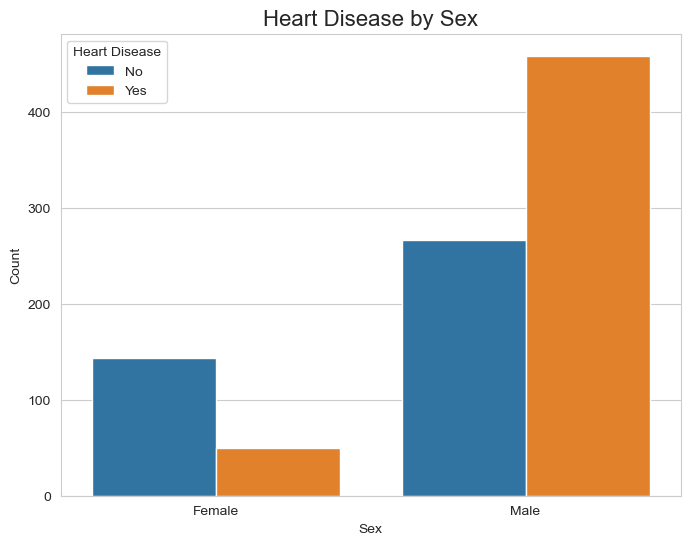

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='heart_disease', data=df)
plt.title('Heart Disease by Sex', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()



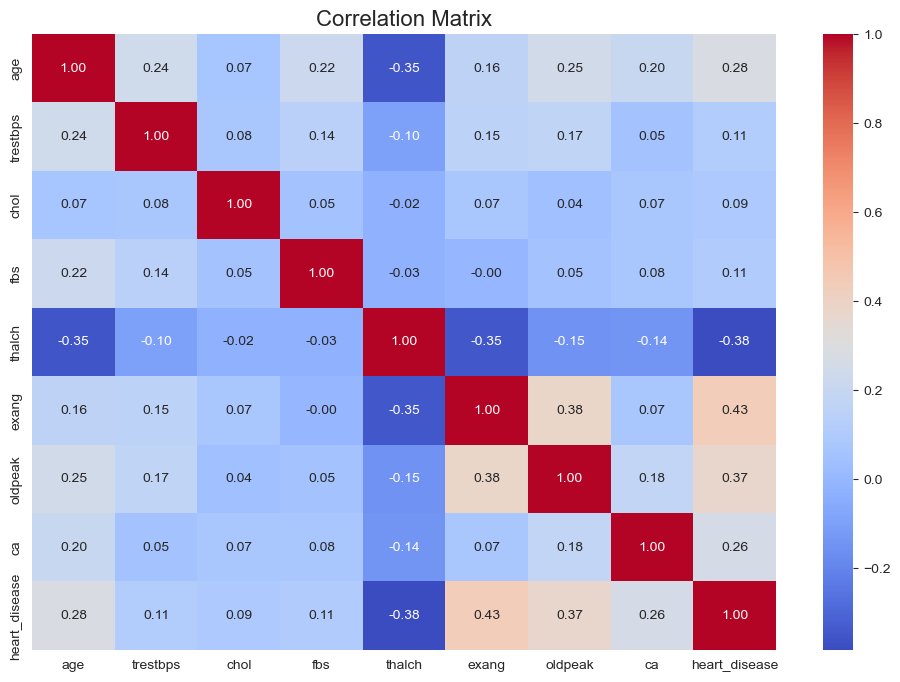

All plots have been generated.




In [24]:

# Plot 6: Correlation Matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()
print("All plots have been generated.")
print("\n" + "="*50 + "\n")

In [25]:
print("All plots have been generated.") 

All plots have been generated.


## Final Preprocessing for Modeling
- This section prepares the data for a machine learning model by encoding categorical features and scaling numerical features.


In [26]:
from sklearn.preprocessing import StandardScaler
import pickle 
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categroical_cols, drop_first=True)

# Scale numerical variables
scaler = StandardScaler()
df[numrical_cols] = scaler.fit_transform(df[numrical_cols])
print("Data cleaning and preprocessing completed successfully.")
df.to_csv('cleaned_heart_disease_data.csv', index=False)
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"\nCleaned data saved to 'cleaned_heart_disease_data.csv'.")
print(f"StandardScaler object saved to '{scaler_filename}'.")
print("\n" + "="*50 + "\n")


Data cleaning and preprocessing completed successfully.

Cleaned data saved to 'cleaned_heart_disease_data.csv'.
StandardScaler object saved to 'scaler.pkl'.




## Feature Importance Analysis
- Use a RandomForestClassifier to identify the most important features.


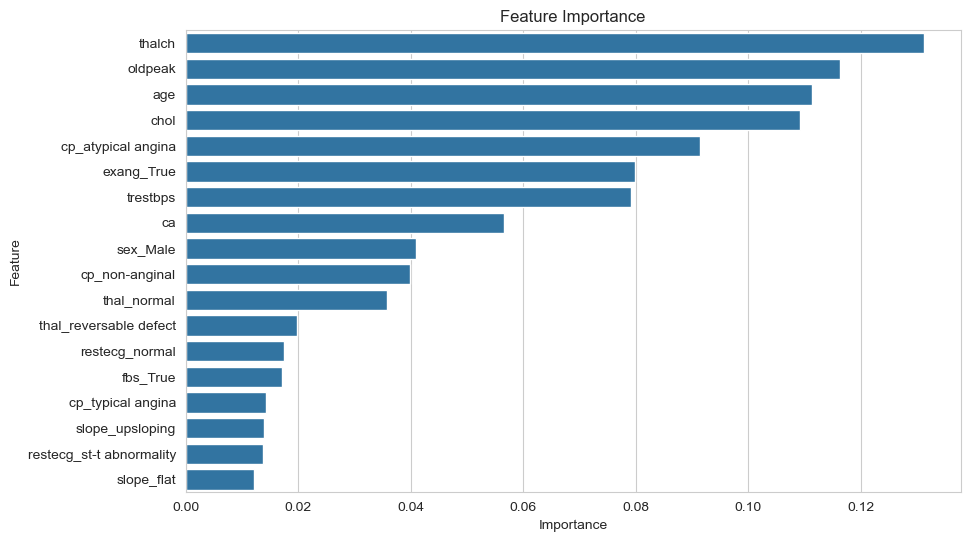

In [27]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

model = RandomForestClassifier()
model.fit(X, y)

importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance')
plt.show()